<a href="https://colab.research.google.com/github/Anggiboy/Pejuang_Data3/blob/main/BANK_MARKETING_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BANK MARKETING

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('https://raw.githubusercontent.com/Anggiboy/Pejuang_Data3/main/bank-full.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# LATAR BELAKANG

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan (atau tidak) berlangganan.
Ada dua set data:
1.	bank-full.csv dengan semua contoh, diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010).
2.	 bank.csv dengan 10% dari contoh (4521), dipilih secara acak dari bank-full.csv.
Kumpulan data terkecil disediakan untuk menguji algoritme pembelajaran mesin yang lebih menuntut komputasi (mis. SVM).
data klien bank:
1.	usia (numerik)
2.	pekerjaan : jenis pekerjaan (kategoris: "admin.", "tidak diketahui", "menganggur", "manajemen", "pembantu rumah tangga", "wirausahawan", "mahasiswa", "kerah biru", "wiraswasta", "pensiunan", "teknisi", "jasa")
3.	perkawinan : status perkawinan (kategori: "menikah", "cerai", "lajang"; catatan: "cerai" berarti cerai atau janda)
4.	pendidikan (kategoris: "tidak diketahui", "sekunder", "primer", "tersier")
5.	default: apakah kredit default? (biner: "ya","tidak")
6.	saldo: saldo tahunan rata-rata, dalam euro (numerik)
7.	perumahan: memiliki pinjaman perumahan? (biner: "ya","tidak")
8.	pinjaman: memiliki pinjaman pribadi? (biner: "ya","tidak") terkait dengan kontak terakhir kampanye saat ini:
9.	kontak: jenis komunikasi kontak (kategoris: "tidak diketahui", "telepon", "seluler")
10.	hari: hari kontak terakhir dalam sebulan (numerik)
11.	bulan: kontak terakhir bulan dalam setahun (kategoris: "jan", "feb", "mar", ..., "nov", "dec")
12.	durasi: durasi kontak terakhir, dalam detik (numerik)



# PERTANYAAN ANALIS

1. Pekerjaan paling banyak ?
2. Pekerjaan paling sedikit  uang
3. Pekerjaan yang paling banyak uang di bank?
4. Pekerjaan yang memiliki paling banyak saldo?
5. Pekerjaan yang memiliki paling banyak saldo?


# EDA (Exploratory Data Analysis)

## Variabel Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Mengecek Missing Data

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

dalam data ini tidak terdata daa yang kosonng atau missing data

## Dimensi Data

In [ ]:
data.shape

(45211, 17)

dalam data ini terdapa 45.211 baris data (observasi) dan 17 kolom data (karakteristik)

## Variabel Data

In [ ]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

terdapat 17 variabel dalam data ini yang mempunyai nama beragam

## korelasi Data

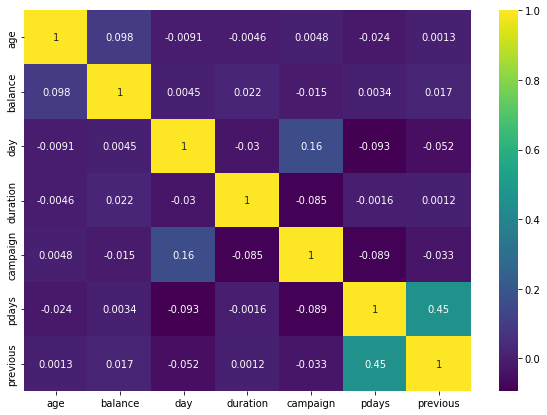

In [ ]:
k = len(data.columns)
cm = data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, cmap = 'viridis')

## Statistik data

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Pairplot

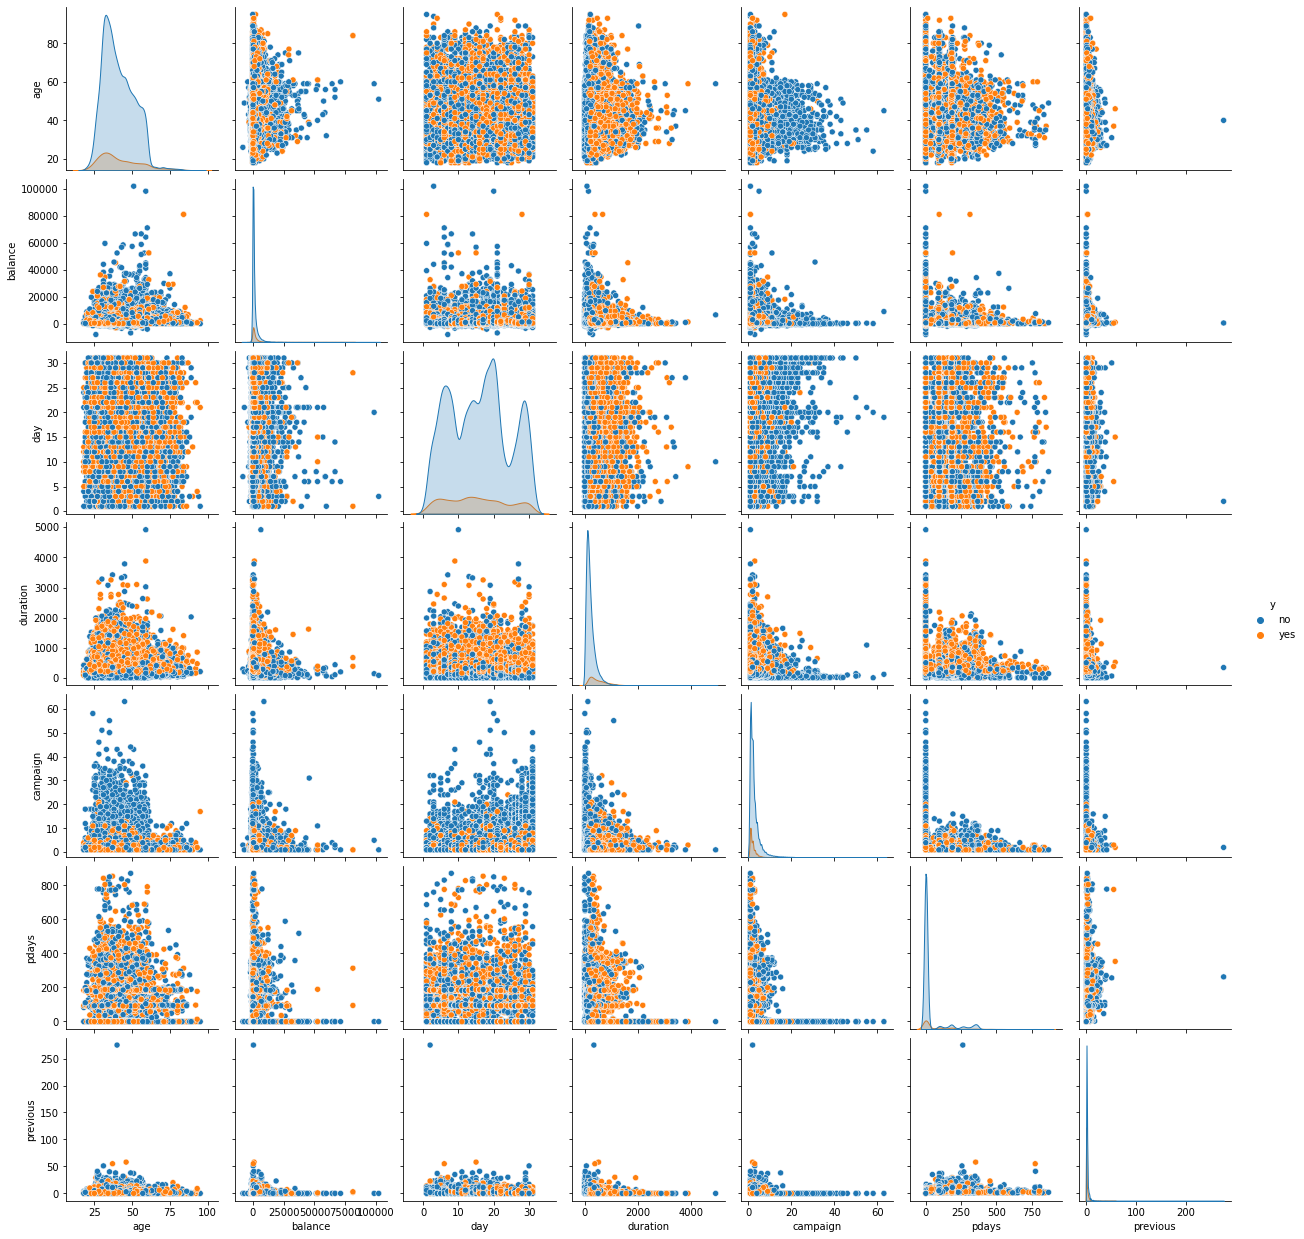

In [ ]:
g = sns.pairplot(data, hue='y')

# DATA PREPARATION

## Seleksi Kolom

In [ ]:
data1=data.drop(columns=["month","loan","housing","poutcome"])
data1.head()


,age,job,marital,education,default,balance,contact,day,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,unknown,5,261,1,-1,0,no
1,44,technician,single,secondary,no,29,unknown,5,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,unknown,5,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,unknown,5,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,unknown,5,198,1,-1,0,no


In [ ]:
data2=data1.drop(columns=["education","default","contact"])
data2

,age,job,marital,balance,day,duration,campaign,pdays,previous,y
0,58,management,married,2143,5,261,1,-1,0,no
1,44,technician,single,29,5,151,1,-1,0,no
2,33,entrepreneur,married,2,5,76,1,-1,0,no
3,47,blue-collar,married,1506,5,92,1,-1,0,no
4,33,unknown,single,1,5,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,825,17,977,3,-1,0,yes
45207,71,retired,divorced,1729,17,456,2,-1,0,yes
45208,72,retired,married,5715,17,1127,5,184,3,yes
45209,57,blue-collar,married,668,17,508,4,-1,0,no


## Mengubah Data Kategorik Menjadi Numerik

In [ ]:
data2.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

mengetahui jumlah indeks pada kolom y

In [ ]:
cleanup_nums = {"y":{"no":0,"yes":1}}
data3=data2.replace(cleanup_nums)
data3

,age,job,marital,balance,day,duration,campaign,pdays,previous,y
0,58,management,married,2143,5,261,1,-1,0,0
1,44,technician,single,29,5,151,1,-1,0,0
2,33,entrepreneur,married,2,5,76,1,-1,0,0
3,47,blue-collar,married,1506,5,92,1,-1,0,0
4,33,unknown,single,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,825,17,977,3,-1,0,1
45207,71,retired,divorced,1729,17,456,2,-1,0,1
45208,72,retired,married,5715,17,1127,5,184,3,1
45209,57,blue-collar,married,668,17,508,4,-1,0,0


## Info Data

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   job       45211 non-null  object
 2   marital   45211 non-null  object
 3   balance   45211 non-null  int64 
 4   day       45211 non-null  int64 
 5   duration  45211 non-null  int64 
 6   campaign  45211 non-null  int64 
 7   pdays     45211 non-null  int64 
 8   previous  45211 non-null  int64 
 9   y         45211 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 3.4+ MB


## Deskripsi Data

In [ ]:
data3.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


# Visualization

## Data Frame

In [ ]:
job=pd.DataFrame(data3.job.value_counts())
job

,job
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303
housemaid,1240


## Diagram Batang

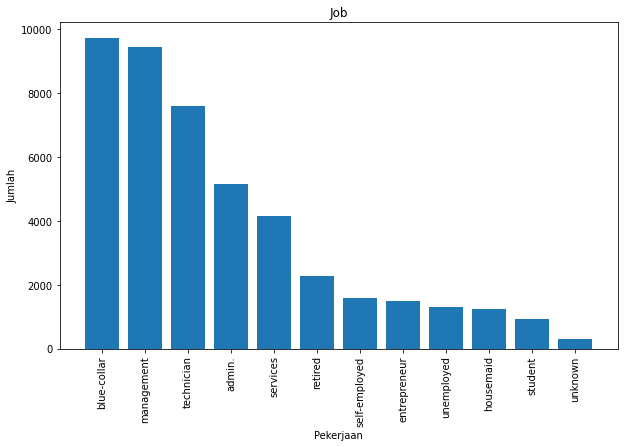

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
ax=plt.bar(job.index,job['job'])
plt.xticks(rotation=90)
plt.title("Job")
plt.ylabel("Jumlah")
plt.xlabel("Pekerjaan")
plt.show()


Bisa di lihat dalam grafik bawasanya data pekerjaan yang paling banyak yaitu blue-collar dan data perkerjaan paling sedikit yaitu student serta ada beberapa yang tidak memiliki pekerjaan.

In [ ]:
job.max()

job    9732
dtype: int64

In [ ]:
job.min()

job    288
dtype: int64